# Digital image and signal processing

## Exercise 6

The aim of the exercise is to apply point transformations to the loaded images and observe their effect.

### Authors

- Kinga Marek
- Mariusz Wiśniewski

### Libraries used

In [1]:
import os
import skimage
from skimage import io
from matplotlib.pyplot import subplot, imshow, title, show, subplots_adjust, rcParams
rcParams['figure.figsize'] = [10, 10]

### Constant parameters

In [2]:
constant = 1.5
m = 0.45
e = 8
gamma = 0.67

### Useful functions

In [3]:
import itertools


def point_operation(img, method):
    for row, col in itertools.product(range(img.shape[0]), range(img.shape[1])):
        temp = method(img[row][col])
        if temp > 255:
            img[row][col] = 255
        elif temp < 0:
            img[row][col] = 0
        else:
            img[row][col] = temp
    return img


def multiply(val):
    return val * constant


def change_dynamic_range(val):
    return 1 if val == 0 else 1 / (1 + (m / val) ** e)


def gamma_correction(val):
    return constant * (val ** gamma)

### Loading the image

In [4]:
image = io.imread(os.path.join(skimage.data_dir, 'camera.png'))

### Task 1

Multiply the image by the constant *T(r) = c · r*, where *c* is a constant.

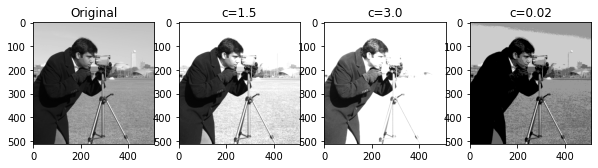

In [5]:
multiplied1 = point_operation(image.copy(), multiply)

constant = 3.0
multiplied2 = point_operation(image.copy(), multiply)

constant = 0.02
multiplied3 = point_operation(image.copy(), multiply)

subplot(141), imshow(image, cmap='gray'), title('Original')
subplot(142), imshow(multiplied1, cmap='gray'), title('c=1.5')
subplot(143), imshow(multiplied2, cmap='gray'), title('c=3.0')
subplot(144), imshow(multiplied3, cmap='gray'), title('c=0.02')
show()

### Task 2

Changing the dynamics of the grayscale (contrast). You can apply the following transformation: <img src="https://latex.codecogs.com/svg.latex?T(r)&space;=&space;\frac{1}{1&plus;(m/r)^{e}}" title="T(r) = \frac{1}{1+(m/r)^{e}}" />, where *m* and *e* are fixed parameters for the transformation (e.g. *m = 0.45*, *e = 8*).

Plot *T(r)* to better visualize the effect of *T* on the contrast of the original image. Perform experiments with different values of the parameters *m* and *e*.

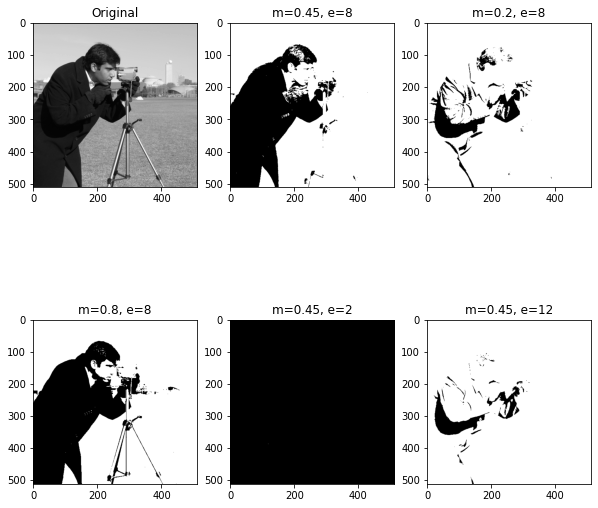

In [6]:
changed_dynamic1 = point_operation(image.copy(), change_dynamic_range)

m = 0.2
changed_dynamic2 = point_operation(image.copy(), change_dynamic_range)

m = 0.8
changed_dynamic3 = point_operation(image.copy(), change_dynamic_range)

m = 0.45
e = 2
changed_dynamic4 = point_operation(image.copy(), change_dynamic_range)

e = 12
changed_dynamic5 = point_operation(image.copy(), change_dynamic_range)

subplot(231), imshow(image, cmap='gray'), title('Original')
subplot(232), imshow(changed_dynamic1, cmap='gray'), title('m=0.45, e=8')
subplot(233), imshow(changed_dynamic2, cmap='gray'), title('m=0.2, e=8')
subplot(234), imshow(changed_dynamic3, cmap='gray'), title('m=0.8, e=8')
subplot(235), imshow(changed_dynamic4, cmap='gray'), title('m=0.45, e=2')
subplot(236), imshow(changed_dynamic5, cmap='gray'), title('m=0.45, e=12')
show()

### Task 3

Gamma correction, defined as <img src="https://latex.codecogs.com/svg.latex?s&space;=&space;c*r^{\gamma}" title="s = c*r^{\gamma}" />, where *c > 0* and *γ > 0* are constants in the transformation formula.

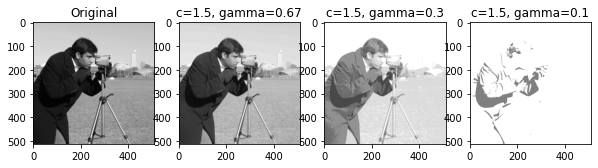

In [7]:
constant = 1.5
gamma_corrected1 = point_operation(image.copy(), gamma_correction)

gamma = 0.3
gamma_corrected2 = point_operation(image.copy(), gamma_correction)

gamma = 0.1
gamma_corrected3 = point_operation(image.copy(), gamma_correction)

subplot(141), imshow(image, cmap='gray'), title('Original')
subplot(142), imshow(gamma_corrected1, cmap='gray'), title('c=1.5, gamma=0.67')
subplot(143), imshow(gamma_corrected2, cmap='gray'), title('c=1.5, gamma=0.3')
subplot(144), imshow(gamma_corrected3, cmap='gray'), title('c=1.5, gamma=0.1')
show()